## Observations and Insights

1. The plot of final tumor volume across the four most effective regimens indicate that the mean tumor volume distribution is not
a normal curve, and there are outliers which make the mean to be skewed. This means some drug regimens are not as effective in reducing the tumor size.

2. Capomulin seems to be a strong regimen, and as we see in the plot for mouse S185, the drug regimen over time reduced the tumor volume significantly

3. There is a high correlation (0.95) between the mouse weight and its average tumor size. The graph and linear regression indicate 
a strong positive correlation.


## Dependencies and starter code

In [131]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
joined_data = mouse_metadata.merge(study_results, on='Mouse ID')
joined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [132]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

#group data by regimen
joined_data_grouped = joined_data.groupby(['Drug Regimen'])

#calculate mean, median, variance, std dev, and SEM of the Tumor volume for each regimen
mean_df = joined_data_grouped['Tumor Volume (mm3)'].mean()
median_df = joined_data_grouped['Tumor Volume (mm3)'].median()
variance_df = joined_data_grouped['Tumor Volume (mm3)'].var()
std_dev_df = joined_data_grouped['Tumor Volume (mm3)'].std()
std_error_df = joined_data_grouped['Tumor Volume (mm3)'].sem()

#create a new dataframe and concatenate the calculated values
summary_stat = pd.concat([mean_df, median_df, variance_df, std_dev_df, std_error_df], axis=1)
#Add column headings
summary_stat.columns = ['Tumor Volumn Mean', 'Tumor Volume Median', 'Variance', 'Standard Dev', 'SEM']

#display results
summary_stat

,Tumor Volumn Mean,Tumor Volume Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'No. of data points')

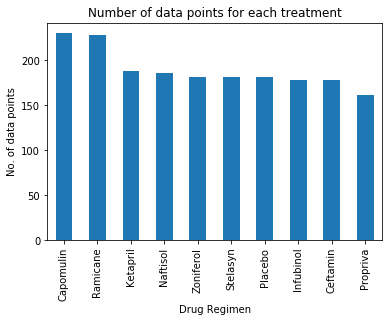

In [133]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#calculate the number of records for each drug regimen
Regimen_df = joined_data['Drug Regimen'].value_counts()

#create a bar plot
plot = Regimen_df.plot(kind="bar", title = "Number of data points for each treatment")

#assign labels
plot.set_xlabel("Drug Regimen")
plot.set_ylabel("No. of data points")


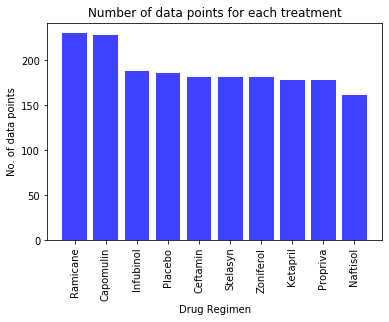

In [134]:
 # Generate a bar plot showing number of data points for each treatment regimen using pyplot

# use the previous datframe containing the number of records for each drug regimen, and get unique values
x_axis = np.arange(0, len(Regimen_df))
x_labels = joined_data['Drug Regimen'].unique()

#create tick locations for the bar chart
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

#assign title and labels
plt.title("Number of data points for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("No. of data points")

#create the bar chart
plt.bar(x_axis, joined_data['Drug Regimen'].value_counts() , facecolor="blue", alpha=0.75, align="center")
plt.xticks(tick_locations, x_labels, rotation = 90)
plt.show()


## Pie plots

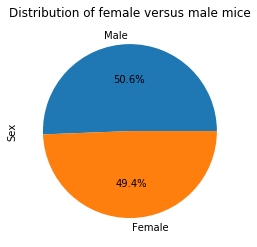

In [135]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# group dataset by Sex
data_group_gender = joined_data.groupby(['Sex'])

# Count data points per Sex
data_gender_df = joined_data['Sex'].value_counts()

#Create the pie chart using pandans dataframe
data_gender_df.plot(kind="pie", title = "Distribution of female versus male mice",autopct="%1.1f%%")


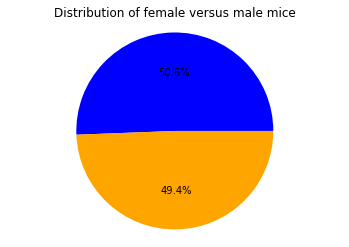

In [136]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#create piechart colors and title
colors = ["blue", "orange"]
plt.title("Distribution of female versus male mice")

#Create the pie chart using pyplot
plt.pie(data_gender_df, colors=colors, autopct="%1.1f%%")
plt.axis("equal")
plt.show()


## Quartiles, outliers and boxplots

For Capomulin, values below 20.70456164999999 could be outliers.
For Capomulin, Values above 51.83201549 could be outliers.
For Ramicane, values below 19.690480101250003 could be outliers.
For Ramicane, Values above 49.79900043124999 could be outliers.
For Infubinol, values below 55.35777559500001 could be outliers.
For Infubinol, Values above 75.08224443499999 could be outliers.
For Ceftamin, values below 52.29350701999999 could be outliers.
For Ceftamin, Values above 76.66786758 could be outliers.
----------------------------------------------------------


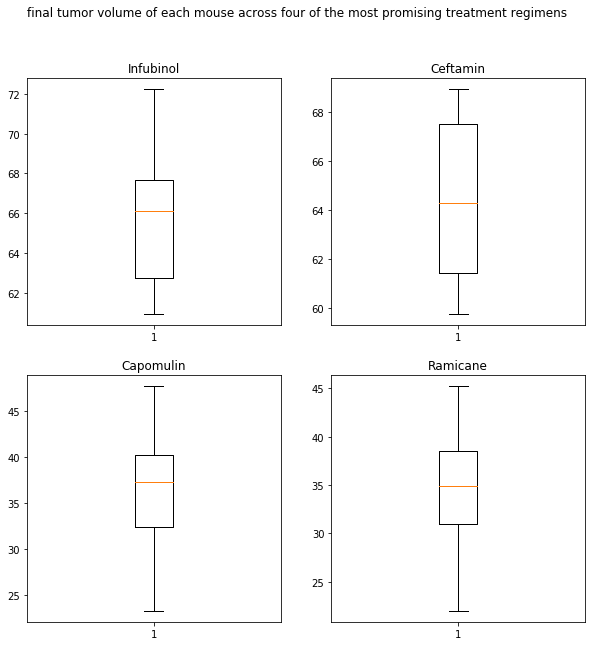

In [137]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

promising_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

fig, axs = plt.subplots(2, 2)
fig.suptitle('final tumor volume of each mouse across four of the most promising treatment regimens')
i=1

for drug in promising_drugs:
   
    df = joined_data.loc[joined_data['Drug Regimen'].isin([str(drug)])]
    #Max of timepoint in the dataset stores the most recent tumor volume measurment
    maxvalue = df['Timepoint'].max()
    final_df = df.loc[df['Timepoint'] == maxvalue]

    # calculate quantiles, lower and upper bounds and IQR
    quantiles = final_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quantiles[0.25]
    upperq = quantiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"For {drug}, values below {lower_bound} could be outliers.")
    print(f"For {drug}, Values above {upper_bound} could be outliers.")
    if (i==1):
        axs[1][0].set_title(drug)
        axs[1][0].boxplot(final_df['Tumor Volume (mm3)'])
    elif(i==2):
        axs[1][1].set_title(drug)
        axs[1][1].boxplot(final_df['Tumor Volume (mm3)'])
    elif(i==3):
        axs[0][0].set_title(drug)
        axs[0][0].boxplot(final_df['Tumor Volume (mm3)'])    
    elif(i==4):
        axs[0][1].set_title(drug)
        axs[0][1].boxplot(final_df['Tumor Volume (mm3)']) 
        
    i+=1
    
print("----------------------------------------------------------")
plt.gcf().set_size_inches(10, 10)
plt.show()

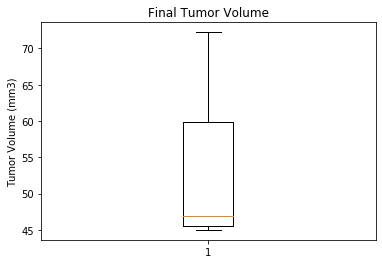

In [138]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# drug regimens of interest are: Capomulin, Ramicane, Infubinol, Ceftamin

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')

# max_df, from above, contains the final tumor volume of each mouse across four of the most promising treatment regimens
ax1.boxplot(max_df['Tumor Volume (mm3)'])
plt.show()


## Line and scatter plots

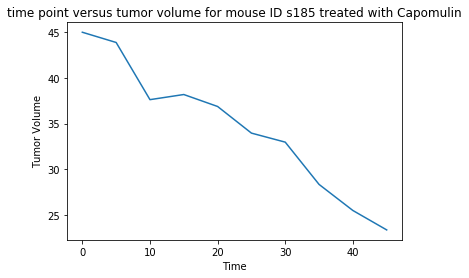

In [139]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Assumption: the question is asking for the data for one mouse only, so I picked a random mouse, with ID = s185
Capomulin_df = top_drugs_volume_df.loc[(top_drugs_volume_df['Drug Regimen'] == 'Capomulin') & (top_drugs_volume_df['Mouse ID'] == 's185')]
Capomulin_df = Capomulin_df.sort_values(by='Timepoint')

plt.title("time point versus tumor volume for mouse ID s185 treated with Capomulin")
plt.xlabel("Time")
plt.ylabel("Tumor Volume")

plt.plot(Capomulin_df['Timepoint'], Capomulin_df['Tumor Volume (mm3)'])
plt.show()


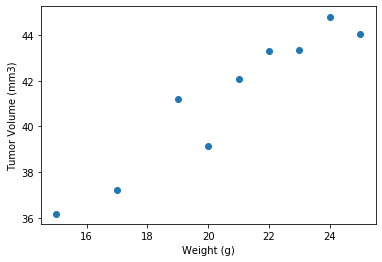

In [140]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin_df = top_drugs_volume_df.loc[(top_drugs_volume_df['Drug Regimen'] == 'Capomulin')]
Capomulin_df = Capomulin_df.groupby(['Weight (g)'])
Capomulin_mean_df = Capomulin_df['Tumor Volume (mm3)'].mean()
weight_df = Capomulin_df['Weight (g)'].mean()

#create a new Dataframe to combine mouse weights and the tumor volume averages
results_df = pd.concat([weight_df, Capomulin_mean_df], axis=1)

# create the scatter plot
plt.scatter(results_df['Weight (g)'], results_df['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



In [141]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

Capomulin_mean_df = Capomulin_df['Tumor Volume (mm3)'].mean()
weight_df = Capomulin_df['Weight (g)'].mean()

#calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin drug
# shows a high correlation, which means heavier mouse have larger tumors on average
correlation = st.pearsonr(weight_df,Capomulin_mean_df)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")


The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.95


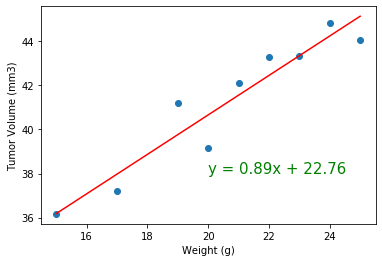

In [142]:
#set up x and y values
x_values = results_df['Weight (g)']
y_values = results_df['Tumor Volume (mm3)']

#use linear regression module to calculate slope and y-intercept
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#create equation for the chart
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter chart, annotate and assign labels
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="green")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()